<a href="https://colab.research.google.com/github/i-am-batman-28/Data-Sci/blob/main/Karthik_M_Sarma_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

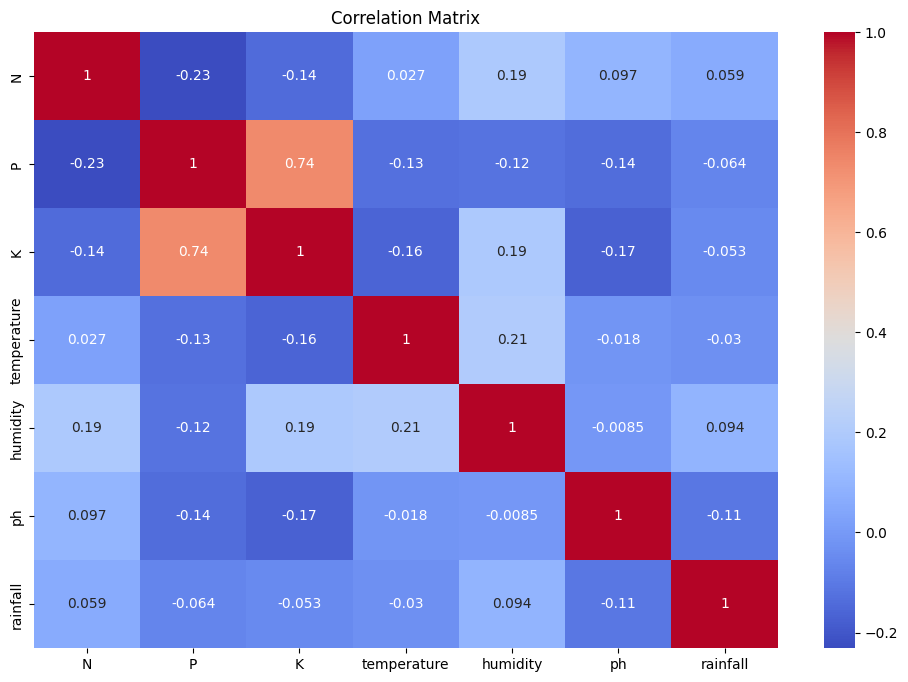

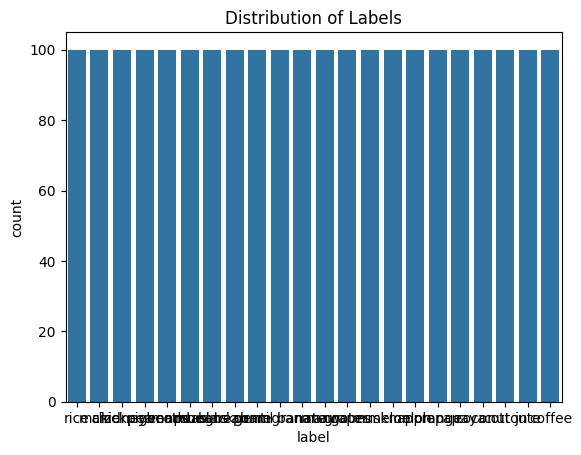



Index(['label'], dtype='object')
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

df = pd.read_csv('Crop.csv')

print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("\n")

sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()
print("\n")

df = df.dropna()

print(df.select_dtypes(include=['object']).columns)

print(df['label'].unique())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print(df.head())




In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\n")

(1760, 7) (440, 7) (1760,) (440,)




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

m = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier()
}

trained_model_list = []
model_list = []
r2_list = []

results = {}
for model_name, m in m.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f'{model_name} Accuracy: {acc:.6f}')

print("\nModel Training Performance:")
for model_name, acc in results.items():
    print(f'{model_name}: {acc:.6f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.950000
Naive Bayes Accuracy: 0.995455
Support Vector Machine Accuracy: 0.961364
K-Nearest Neighbors Accuracy: 0.970455
Decision Tree Accuracy: 0.986364
Random Forest Accuracy: 0.993182


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.988636
Gradient Boosting Accuracy: 0.981818

Model Performance:
Logistic Regression: 0.950000
Naive Bayes: 0.995455
Support Vector Machine: 0.961364
K-Nearest Neighbors: 0.970455
Decision Tree: 0.986364
Random Forest: 0.993182
Bagging: 0.988636
Gradient Boosting: 0.981818


In [ ]:
best_model_name = max(results, key=results.get)
best_model = m[best_model_name]

print(f'\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}')



Best Model: Naive Bayes with Accuracy: 0.9955


In [ ]:
import pickle

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
pickle_filename = 'Naive Bayes.pkl'
with open(pickle_filename, 'wb') as file:
  pickle.dump(naive_bayes, file)
print(f'Model saved to {pickle_filename}')

Model saved to Naive Bayes.pkl


In [ ]:
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

print(f'Predictions: {y_pred[:10]}')
print(f'Actual Labels: {y_test[:10].values}\n')


Predictions: [15 21 17 17  0 12  0 13 14 10]
Actual Labels: [15 21 17 17  0 12  0 13 14 10]



In [ ]:
files.download('Naive Bayes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>